## ML for foot traffic score
Prediction for the foot traffic score using the Yellow Taxi Data from 2020 - 2023 to predict the foot traffic score during daytimes (morning, afternoon, evening, night)

**2020**

In [ ]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

# 1. Load the CSV file
df_2020 = pd.read_csv('2020_Yellow_Taxi_Trip_Data_20250711.csv')

# 2. Convert pickup datetime using the correct format (e.g., "01/01/2021 12:30:10 AM")
df_2020['tpep_pickup_datetime'] = pd.to_datetime(
    df_2020['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

df_2020['tpep_dropoff_datetime'] = pd.to_datetime(
    df_2020['tpep_dropoff_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# 3. Drop rows where conversion failed
df_2020 = df_2020.dropna(subset=['tpep_pickup_datetime'])
df_2020 = df_2020.dropna(subset=['tpep_dropoff_datetime'])

# 3b. Filter for Manhattan trips only (pickup and dropoff)
manhattan_zone_ids = [
    4, 12, 13, 14, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90,
    100, 107, 113, 114, 116, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148,
    151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 230, 231, 232, 233, 234
]
df_2020 = df_2020[
    df_2020['PULocationID'].isin(manhattan_zone_ids) &
    df_2020['DOLocationID'].isin(manhattan_zone_ids)
]

# 4. Extract pickup hour
df_2020['pickup_hour'] = df_2020['tpep_pickup_datetime'].dt.hour
df_2020['dropoff_hour'] = df_2020['tpep_dropoff_datetime'].dt.hour

# 5. Assign time of day
def get_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'  # Consistent with your previous naming

df_2020['time_of_day'] = df_2020['pickup_hour'].apply(get_time_of_day)

#Count pick ups and drop offs

zones = gpd.read_file("taxi_zones/taxi_zones.shp") 

#Merge zones with pick up and drop off data

#Normalize pickups and drop offs
scaler = MinMaxScaler((1, 10))

#weighted sum of normalized score foot traffic score_2020 (0.7drop off + 0.3pickup)

# 6. FILTERS: View or use specific time-of-day groups

# Filter for MORNING trips
morning_df_2020 = df_2020[df_2020['time_of_day'] == 'morning']
print("Morning Manhattan trips sample:")
print(morning_df_2020.head())

# Filter for AFTERNOON trips
afternoon_df_2020 = df_2020[df_2020['time_of_day'] == 'afternoon']
print("\nAfternoon Manhattan trips sample:")
print(afternoon_df_2020.head())

# Filter for EVENING/NIGHT trips
evening_df_2020 = df_2020[df_2020['time_of_day'] == 'evening']
print("\nEvening Manhattan trips sample:")
print(evening_df_2020.head())

**2021**

In [ ]:
import pandas as pd

# 1. Load the CSV file
df_2021 = pd.read_csv('2021_Yellow_Taxi_Trip_Data_20250711.csv')

# 2. Convert pickup datetime using the correct format (e.g., "01/01/2021 12:30:10 AM")
df_2021['tpep_pickup_datetime'] = pd.to_datetime(
    df_2021['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

df_2021['tpep_dropoff_datetime'] = pd.to_datetime(
    df_2021['tpep_dropoff_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# 3. Drop rows where conversion failed
df_2021 = df_2021.dropna(subset=['tpep_pickup_datetime'])
df_2021 = df_2021.dropna(subset=['tpep_dropoff_datetime'])

# 3b. Filter for Manhattan trips only (pickup and dropoff)
manhattan_zone_ids = [
    4, 12, 13, 14, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90,
    100, 107, 113, 114, 116, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148,
    151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 230, 231, 232, 233, 234
]
df_2021 = df_2021[
    df_2021['PULocationID'].isin(manhattan_zone_ids) &
    df_2021['DOLocationID'].isin(manhattan_zone_ids)
]

# 4. Extract pickup hour
df_2021['pickup_hour'] = df_2021['tpep_pickup_datetime'].dt.hour
df_2021['dropoff_hour'] = df_2021['tpep_dropoff_datetime'].dt.hour

# 5. Assign time of day
def get_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'  # Consistent with your previous naming

df_2021['time_of_day'] = df_2021['pickup_hour'].apply(get_time_of_day)

#Count pick ups and drop offs

zones = gpd.read_file("taxi_zones/taxi_zones.shp") 

#Merge zones with pick up and drop off data

#Normalize pickups and drop offs
scaler = MinMaxScaler((1, 10))

#weighted sum of normalized score foot traffic score_2020 (0.7drop off + 0.3pickup)

# 6. FILTERS: View or use specific time-of-day groups

# Filter for MORNING trips
morning_df_2021 = df_2021[df_2021['time_of_day'] == 'morning']
print("Morning Manhattan trips sample:")
print(morning_df_2021.head())

# Filter for AFTERNOON trips
afternoon_df_2021 = df_2021[df_2021['time_of_day'] == 'afternoon']
print("\nAfternoon Manhattan trips sample:")
print(afternoon_df_2021.head())

# Filter for EVENING/NIGHT trips
evening_df_2021 = df_2021[df_2021['time_of_day'] == 'evening']
print("\nEvening Manhattan trips sample:")
print(evening_df_2021.head())

In [4]:
import pandas as pd

# 1. Load the CSV file
df = pd.read_csv('2021_Yellow_Taxi_Trip_Data_20250711.csv')

# 2. Convert pickup datetime using the correct format (e.g., "01/01/2021 12:30:10 AM")
df['tpep_pickup_datetime'] = pd.to_datetime(
    df['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# 3. Drop rows where conversion failed
df = df.dropna(subset=['tpep_pickup_datetime'])

# 3b. Filter for Manhattan trips only (pickup and dropoff)
manhattan_zone_ids = [
    4, 12, 13, 14, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90,
    100, 107, 113, 114, 116, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148,
    151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 230, 231, 232, 233, 234
]
df = df[
    df['PULocationID'].isin(manhattan_zone_ids) &
    df['DOLocationID'].isin(manhattan_zone_ids)
]

# 4. Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# 5. Assign time of day
def get_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'  # Consistent with your previous naming

df['time_of_day'] = df['pickup_hour'].apply(get_time_of_day)

# 6. FILTERS: View or use specific time-of-day groups

# Filter for MORNING trips
morning_df = df[df['time_of_day'] == 'morning']
print("Morning Manhattan trips sample:")
print(morning_df.head())

# Filter for AFTERNOON trips
afternoon_df = df[df['time_of_day'] == 'afternoon']
print("\nAfternoon Manhattan trips sample:")
print(afternoon_df.head())

# Filter for EVENING/NIGHT trips
evening_df = df[df['time_of_day'] == 'evening']
print("\nEvening Manhattan trips sample:")
print(evening_df.head())

/var/folders/5m/lm7lkjcj0091slj1knvhj6g00000gn/T/ipykernel_20035/4164896371.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021_Yellow_Taxi_Trip_Data_20250711.csv')


Morning Manhattan trips sample:
      VendorID tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
4056       2.0  2021-01-01 07:01:47  01/01/2021 07:09:00 AM              1.0   
4077       2.0  2021-01-01 07:00:08  01/01/2021 07:09:59 AM              1.0   
4338       1.0  2021-01-01 07:46:26  01/01/2021 08:01:36 AM              1.0   
4340       1.0  2021-01-01 07:09:54  01/01/2021 07:13:45 AM              1.0   
4341       1.0  2021-01-01 07:23:29  01/01/2021 07:30:48 AM              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4056           1.81         1.0                  N            75   
4077           3.99         1.0                  N            75   
4338           3.70         1.0                  N           142   
4340           1.70         1.0                  N            79   
4341           2.60         1.0                  N            79   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4

**2022**

In [ ]:
import pandas as pd

# 1. Load the CSV file
df_2022 = pd.read_csv('2022_Yellow_Taxi_Trip_Data_20250711.csv')

# 2. Convert pickup datetime using the correct format (e.g., "01/01/2021 12:30:10 AM")
df_2022['tpep_pickup_datetime'] = pd.to_datetime(
    df_2022['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

df_2022['tpep_dropoff_datetime'] = pd.to_datetime(
    df_2022['tpep_dropoff_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# 3. Drop rows where conversion failed
df_2022 = df_2022.dropna(subset=['tpep_pickup_datetime'])
df_2022 = df_2022.dropna(subset=['tpep_dropoff_datetime'])

# 3b. Filter for Manhattan trips only (pickup and dropoff)
manhattan_zone_ids = [
    4, 12, 13, 14, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90,
    100, 107, 113, 114, 116, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148,
    151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 230, 231, 232, 233, 234
]
df_2022 = df_2022[
    df_2022['PULocationID'].isin(manhattan_zone_ids) &
    df_2022['DOLocationID'].isin(manhattan_zone_ids)
]

# 4. Extract pickup hour
df_2022['pickup_hour'] = df_2022['tpep_pickup_datetime'].dt.hour
df_2022['dropoff_hour'] = df_2022['tpep_dropoff_datetime'].dt.hour

# 5. Assign time of day
def get_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'  # Consistent with your previous naming

df_2022['time_of_day'] = df_2022['pickup_hour'].apply(get_time_of_day)

#Count pick ups and drop offs

zones = gpd.read_file("taxi_zones/taxi_zones.shp") 

#Merge zones with pick up and drop off data

#Normalize pickups and drop offs
scaler = MinMaxScaler((1, 10))

#weighted sum of normalized score foot traffic score_2020 (0.7drop off + 0.3pickup)

# 6. FILTERS: View or use specific time-of-day groups

# Filter for MORNING trips
morning_df_2022 = df_2022[df_2022['time_of_day'] == 'morning']
print("Morning Manhattan trips sample:")
print(morning_df_2022.head())

# Filter for AFTERNOON trips
afternoon_df_2022 = df_2022[df_2022['time_of_day'] == 'afternoon']
print("\nAfternoon Manhattan trips sample:")
print(afternoon_df_2022.head())

# Filter for EVENING/NIGHT trips
evening_df_2022 = df_2022[df_2022['time_of_day'] == 'evening']
print("\nEvening Manhattan trips sample:")
print(evening_df_2022.head())

**2023**

In [ ]:
import pandas as pd

# 1. Load the CSV file
df_2023 = pd.read_csv('2023_Yellow_Taxi_Trip_Data_20250711.csv')

# 2. Convert pickup datetime using the correct format (e.g., "01/01/2021 12:30:10 AM")
df_2023['tpep_pickup_datetime'] = pd.to_datetime(
    df_2023['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

df_2023['tpep_dropoff_datetime'] = pd.to_datetime(
    df_2023['tpep_dropoff_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# 3. Drop rows where conversion failed
df_2023 = df_2023.dropna(subset=['tpep_pickup_datetime'])
df_2023 = df_2023.dropna(subset=['tpep_dropoff_datetime'])

# 3b. Filter for Manhattan trips only (pickup and dropoff)
manhattan_zone_ids = [
    4, 12, 13, 14, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90,
    100, 107, 113, 114, 116, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148,
    151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 230, 231, 232, 233, 234
]
df_2023 = df_2023[
    df_2023['PULocationID'].isin(manhattan_zone_ids) &
    df_2023['DOLocationID'].isin(manhattan_zone_ids)
]

# 4. Extract pickup hour
df_2023['pickup_hour'] = df_2023['tpep_pickup_datetime'].dt.hour
df_2023['dropoff_hour'] = df_2023['tpep_dropoff_datetime'].dt.hour

# 5. Assign time of day
def get_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'  # Consistent with your previous naming

df_2023['time_of_day'] = df_2023['pickup_hour'].apply(get_time_of_day)

#Count pick ups and drop offs

zones = gpd.read_file("taxi_zones/taxi_zones.shp") 

#Merge zones with pick up and drop off data

#Normalize pickups and drop offs
scaler = MinMaxScaler((1, 10))

#weighted sum of normalized score foot traffic score_2020 (0.7drop off + 0.3pickup)

# 6. FILTERS: View or use specific time-of-day groups

# Filter for MORNING trips
morning_df_2023 = df_2023[df_2023['time_of_day'] == 'morning']
print("Morning Manhattan trips sample:")
print(morning_df_2023.head())

# Filter for AFTERNOON trips
afternoon_df_2023 = df_2023[df_2023['time_of_day'] == 'afternoon']
print("\nAfternoon Manhattan trips sample:")
print(afternoon_df_2023.head())

# Filter for EVENING/NIGHT trips
evening_df_2023 = df_2023[df_2023['time_of_day'] == 'evening']
print("\nEvening Manhattan trips sample:")
print(evening_df_2023.head())

**Spatial Join with census tract**
<br>Tag foot traffic score for each year with GEOID

**Historical scores 2020 - 2023 in wide format**

### ML foot traffic score daytimes

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Step 1: Load the dataset ---
df = pd.read_csv('2022_Yellow_Taxi_Trip_Data_20250711.csv')

# --- Step 2: Convert pickup datetime format ---
df['tpep_pickup_datetime'] = pd.to_datetime(
    df['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# --- Step 3: Drop invalid datetime rows ---
df = df.dropna(subset=['tpep_pickup_datetime'])

# --- Step 4: Filter for Manhattan pickups and dropoffs ---
manhattan_zone_ids = [
    4, 12, 13, 14, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90,
    100, 107, 113, 114, 116, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148,
    151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 230, 231, 232, 233, 234
]
df = df[
    df['PULocationID'].isin(manhattan_zone_ids) &
    df['DOLocationID'].isin(manhattan_zone_ids)
]

# --- Step 5: Feature engineering ---
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

def get_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['time_of_day'] = df['pickup_hour'].apply(get_time_of_day)

# --- Step 6: Sample the dataset to speed up training ---
df = df.sample(n=10000, random_state=42)

# --- Step 7: Prepare features and target ---
features = ['pickup_hour', 'trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID', 'time_of_day']
target = 'tip_amount'

df = df.dropna(subset=features + [target])  # remove missing values
X = df[features]
y = df[target]

# --- Step 8: Preprocessing pipeline ---
categorical_features = ['PULocationID', 'DOLocationID', 'time_of_day']
numerical_features = ['pickup_hour', 'trip_distance', 'fare_amount']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# --- Step 9: ML pipeline with Random Forest ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))
])

# --- Step 10: Split data and train ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# --- Step 11: Predict and evaluate ---
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")

/var/folders/5m/lm7lkjcj0091slj1knvhj6g00000gn/T/ipykernel_26227/2955998394.py:11: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021_Yellow_Taxi_Trip_Data_20250711.csv')


✅ Root Mean Squared Error (RMSE): 3.03


Linear regresion

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Step 1: Load the dataset ---
df = pd.read_csv('2023_Yellow_Taxi_Trip_Data_20250711.csv')

# --- Step 2: Convert pickup datetime ---
df['tpep_pickup_datetime'] = pd.to_datetime(
    df['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)
df = df.dropna(subset=['tpep_pickup_datetime'])

# --- Step 3: Filter for Manhattan pickups and dropoffs ---
manhattan_zone_ids = [
    4, 12, 13, 14, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90,
    100, 107, 113, 114, 116, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148,
    151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 230, 231, 232, 233, 234
]
df = df[
    df['PULocationID'].isin(manhattan_zone_ids) &
    df['DOLocationID'].isin(manhattan_zone_ids)
]

# --- Step 4: Feature engineering ---
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

def get_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['time_of_day'] = df['pickup_hour'].apply(get_time_of_day)

# --- Step 5: Sample for performance ---
df = df.sample(n=10000, random_state=42)

# --- Step 6: Define features and target ---
features = ['pickup_hour', 'trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID', 'time_of_day']
target = 'tip_amount'

df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]

# --- Step 7: Preprocessing pipeline ---
categorical_features = ['PULocationID', 'DOLocationID', 'time_of_day']
numerical_features = ['pickup_hour', 'trip_distance', 'fare_amount']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# --- Step 8: Linear Regression pipeline ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- Step 9: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 10: Train and evaluate ---
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ Linear Regression RMSE: {rmse:.2f}")

/var/folders/5m/lm7lkjcj0091slj1knvhj6g00000gn/T/ipykernel_26227/722797213.py:11: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021_Yellow_Taxi_Trip_Data_20250711.csv')


✅ Linear Regression RMSE: 3.03


/var/folders/5m/lm7lkjcj0091slj1knvhj6g00000gn/T/ipykernel_26227/1143830556.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/5m/lm7lkjcj0091slj1knvhj6g00000gn/T/ipykernel_26227/1143830556.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/5m/lm7lkjcj0091slj1knvhj6g00000gn/T/ipykernel_26227/1143830556.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


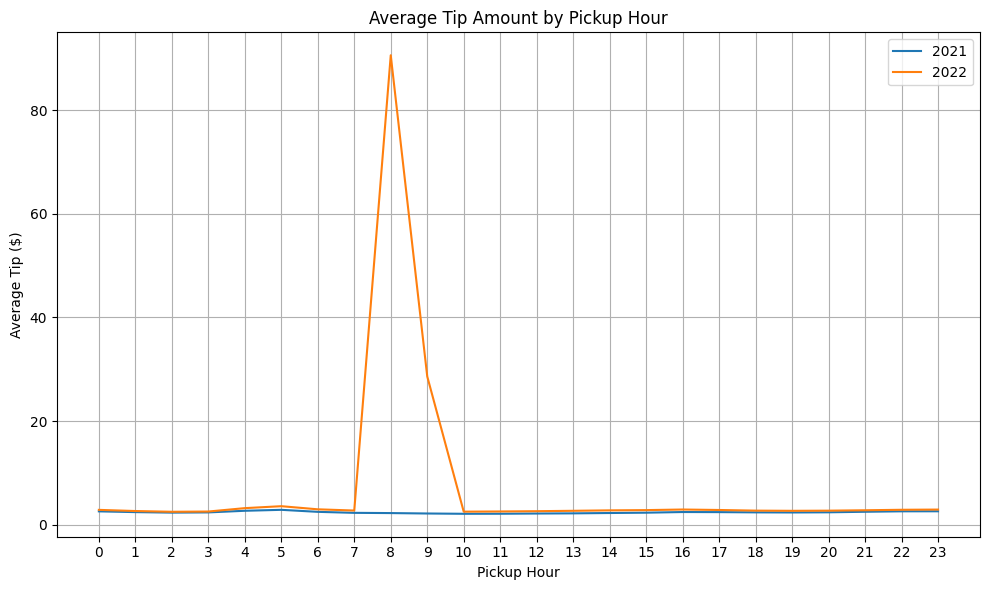

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and prepare data
def load_and_prepare(filepath, year_label):
    df = pd.read_csv(filepath)
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    df = df.dropna(subset=['tpep_pickup_datetime', 'tip_amount'])
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['year'] = year_label
    return df[['pickup_hour', 'tip_amount', 'year']]

# ✅ UPDATE ONLY FILES THAT EXIST
df_2021 = load_and_prepare('2021_Yellow_Taxi_Trip_Data_20250711.csv', 2021)
df_2022 = load_and_prepare('2022_Yellow_Taxi_Trip_Data_20250711.csv', 2022)
df_2023 = load_and_prepare('2023_Yellow_Taxi_Trip_Data_20250711 .csv', 2023) 

# Combine existing data
df_all = pd.concat([df_2021, df_2022]) 

# Group and plot
avg_tips = df_all.groupby(['year', 'pickup_hour'])['tip_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
for year in avg_tips['year'].unique():
    data = avg_tips[avg_tips['year'] == year]
    plt.plot(data['pickup_hour'], data['tip_amount'], label=f'{year}')

plt.title("Average Tip Amount by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# === FILE PATHS (change if needed) ===
file_2022 = '2022_Yellow_Taxi_Trip_Data.csv'
file_2023 = '2023_Yellow_Taxi_Trip_Data.csv'
file_2024 = '2024_Yellow_Taxi_Trip_Data.csv'
zone_lookup_path = '/Users/jen/Downloads/taxi+_zone_lookup.csv'  # 
# === ✅ Load + Clean One Year of Data ===
def load_data(file_path, zone_file, year, nrows=100_000):  # Safer with nrows limit
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        return pd.DataFrame()

    df = pd.read_csv(file_path, low_memory=False, nrows=nrows)

    # Detect pickup datetime column
    datetime_col = None
    for col in ['tpep_pickup_datetime', 'lpep_pickup_datetime', 'pickup_datetime']:
        if col in df.columns:
            datetime_col = col
            break
    if datetime_col is None:
        print(f"❌ No pickup datetime column in {file_path}")
        return pd.DataFrame()

    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')

    # Load zone lookup and merge
    zones = pd.read_csv(zone_file)
    df = df.merge(zones[['LocationID', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left')

    df = df[(df['Borough'] == 'Manhattan') & (df['tip_amount'] > 0)]
    df['pickup_hour'] = df[datetime_col].dt.hour
    df['year'] = year

    return df[['pickup_hour', 'tip_amount', 'year']]

# === ✅ Load All 3 Years (Sampled) ===
df_2022 = load_data(file_2022, zone_lookup_path, 2022)
df_2023 = load_data(file_2023, zone_lookup_path, 2023)
df_2024 = load_data(file_2024, zone_lookup_path, 2024)

df_all = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
print(f"✅ Loaded {len(df_all):,} total records")

if df_all.empty:
    print("⚠️ No data found. Please double-check file paths and formats.")
else:
    print(df_all.head())

# === ✅ Linear Regression ===
X = df_all[['pickup_hour']]
y = df_all['tip_amount']

model = LinearRegression()
model.fit(X, y)
df_all['predicted_tip'] = model.predict(X)

print("\n📊 Linear Regression Results:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope (pickup_hour): {model.coef_[0]:.2f}")

# === ✅ Plot ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_all, x='pickup_hour', y='tip_amount', hue='year', estimator='mean', ci=None)

# Regression line overlay
hour_range = pd.DataFrame({'pickup_hour': list(range(24))})
hour_range['predicted'] = model.predict(hour_range)

sns.lineplot(data=hour_range, x='pickup_hour', y='predicted', color='black', linestyle='--', label='Regression')

plt.title("Average Tip Amount by Pickup Hour (Manhattan, 2022–2024)")
plt.xlabel("Pickup Hour")
plt.ylabel("Tip Amount ($)")
plt.legend(title='Year')
plt.tight_layout()
plt.show()